## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Dataset

In [2]:
dataset = pd.read_csv("datasets/Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


## Displaying Data Visually

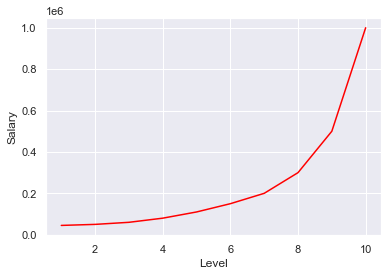

In [3]:
sns.set_theme(style="darkgrid") # other-styles: white, dark, whitegrid ...
plt.plot(dataset.Level,dataset.Salary,color="red")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

## Features and Labels

In [4]:
X = dataset.iloc[:,1].values.reshape(-1,1)
y = dataset.iloc[:,-1].values.reshape(-1,1)

##### No train test split for this model. We will test with manual input

## Training Polynomial Regression

In [5]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(X)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)

LinearRegression()

## Visualizing Results

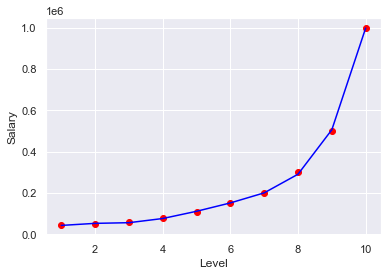

In [6]:
plt.scatter(X,y,color="red")
y_pred = lin_reg.predict(poly_reg.fit_transform(X))
plt.plot(X,y_pred,color="blue")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

## Predicting a New Result

In [7]:
salary = lin_reg.predict(poly_reg.fit_transform([[6.5]]))
print(salary)

[[174878.07765172]]


## Testing which degree polynomial is best fit

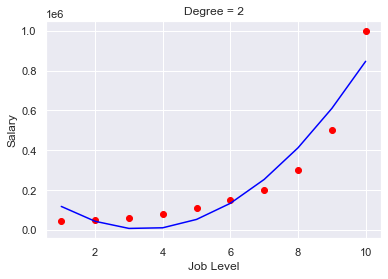

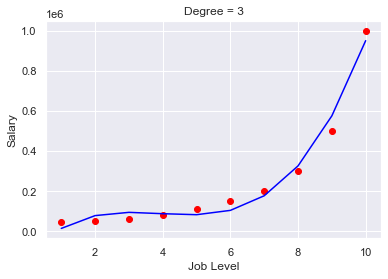

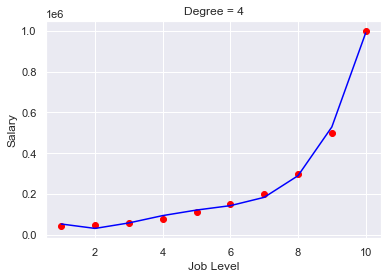

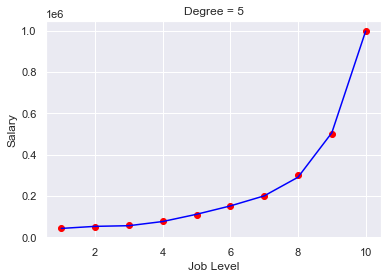

In [8]:
for i in range(2,6):
    poly = PolynomialFeatures(degree = i)
    X_poly = poly.fit_transform(X)
    linear = LinearRegression()
    linear.fit(X_poly,y)
    
    plt.scatter(X,y,color="red")
    y_pred = linear.predict(poly.fit_transform(X))
    plt.plot(X,y_pred,color="blue")
    plt.title("Degree = "+str(i))
    plt.xlabel("Job Level")
    plt.ylabel("Salary")
    plt.show()
    print()